## Let's start with "Hello world!" in Deep Learning - LeNet
LeNet is one of the simplest CNN models that was introduced by Yann LeCun et al. in their 1998 paper, *Gradient-Based Learning Applied to Document Recognition*, was primarily for **Optical Character Recognition(OCR).**  Since it's very simple and accurate, it's often used as a benchmark for validating a new algorithm. In this example, we're going to train a LeNet model with **MNIST** data set and the model can recognize the handwritten characters from 0 to 9. I'm using the simplest LeNet that only has two convolutional layers and two fully connected layers to train. 

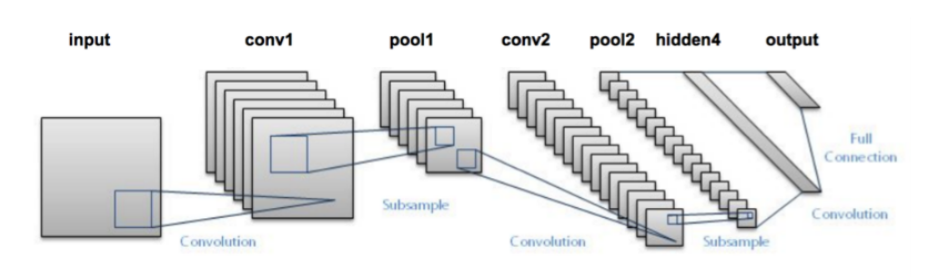
[Photo Credit](https://blog.dataiku.com/deep-learning-with-dss)

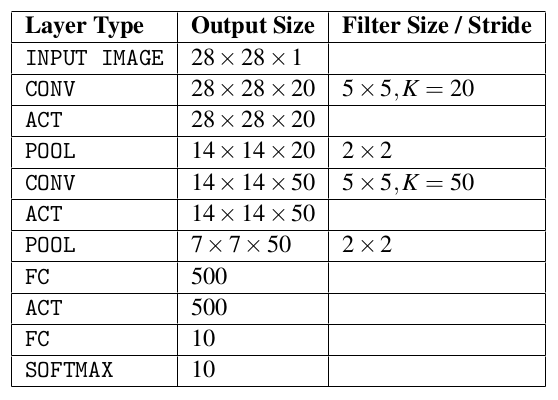

In [1]:
#Reference: Adrian Rosebrock of PyImageSearch - Deep Learning for Computer Vision chater 14
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage.io import imshow
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras import backend as K

class LeNet:
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model
        model = Sequential()
        inputShape = (height, width, depth)

        # if we are using "channels first", update the input shape
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)

        # first set of CONV => RELU => POOL layers
        model.add(Conv2D(20, (5, 5), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # second set of CONV => RELU => POOL layers
        model.add(Conv2D(50, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))

        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        # return the constructed network architecture
        return model
    

Using TensorFlow backend.


## Downlaod handwritten data from MNIST and preprocess the data


In [3]:
# grab the MNIST dataset (if this is your first time using this dataset then the 55MB download may take a minute)
print("[INFO] accessing MNIST...")
dataset = datasets.fetch_mldata("MNIST Original")
data = dataset.data


# if we are using "channels first" ordering, then reshape the design matrix such that the matrix is: num_samples x depth x rows x columns
if K.image_data_format() == "channels_first":
    data = data.reshape(data.shape[0], 1, 28, 28)

# otherwise, we are using "channels last" ordering, so the design
# matrix shape should be: num_samples x rows x columns x depth
else:
    data = data.reshape(data.shape[0], 28, 28, 1)


[INFO] accessing MNIST...


## Split data to train / validation (test) data set

In [4]:

# scale the input data to the range [0, 1] and perform a train/test split
(trainX, testX, trainY, testY) = train_test_split(data / 255.0, dataset.target.astype("int"), test_size=0.25, random_state=42)

# convert the labels from integers to vectors
le = LabelBinarizer()
trainY = le.fit_transform(trainY)
testY = le.transform(testY)


## Build a model and train it 

In [5]:

# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=0.01)
model = LeNet.build(width=28, height=28, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# train the network
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=128, epochs=10, verbose=1)


[INFO] compiling model...
[INFO] training network...
Train on 52500 samples, validate on 17500 samples
Epoch 1/10
52500/52500 [==============================] - 30s 572us/step - loss: 0.9720 - acc: 0.7549 - val_loss: 0.6544 - val_acc: 0.7685
Epoch 2/10
52500/52500 [==============================] - 34s 646us/step - loss: 0.2863 - acc: 0.9135 - val_loss: 0.3583 - val_acc: 0.8853
Epoch 3/10
52500/52500 [==============================] - 33s 634us/step - loss: 0.2027 - acc: 0.9397 - val_loss: 0.3694 - val_acc: 0.8809
Epoch 4/10
52500/52500 [==============================] - 33s 620us/step - loss: 0.1584 - acc: 0.9517 - val_loss: 0.1953 - val_acc: 0.9407
Epoch 5/10
52500/52500 [==============================] - 32s 619us/step - loss: 0.1306 - acc: 0.9612 - val_loss: 0.1286 - val_acc: 0.9621
Epoch 6/10
52500/52500 [==============================] - 33s 630us/step - loss: 0.1098 - acc: 0.9670 - val_loss: 0.1473 - val_acc: 0.9522
Epoch 7/10
52500/52500 [==============================] - 33s 6

## Evaluate the trained model

[INFO] evaluating network...
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1677
          1       0.99      0.99      0.99      1935
          2       0.96      0.99      0.97      1767
          3       0.98      0.96      0.97      1766
          4       0.99      0.97      0.98      1691
          5       0.98      0.97      0.98      1653
          6       0.99      0.98      0.99      1754
          7       0.99      0.93      0.96      1846
          8       0.97      0.96      0.96      1702
          9       0.90      0.98      0.94      1709

avg / total       0.97      0.97      0.97     17500



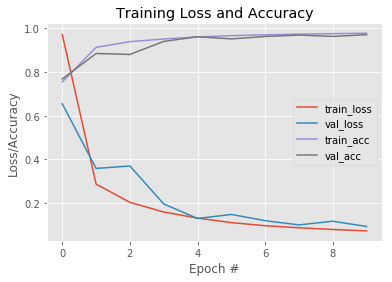

In [6]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=[str(x) for x in le.classes_]))

epochs=10
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

## Visualize predicted results

Predicted result: 2


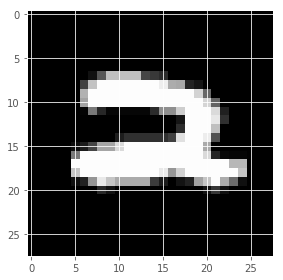

In [8]:
index = 42

imshow(np.squeeze(testX[index]))

print('Predicted result: ' + str(np.argmax(predictions[index])))
